In [58]:
# Imports 
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import sklearn
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from scipy.sparse import coo_matrix, hstack
from sklearn.model_selection import train_test_split
from PIL import Image


In [59]:
df_dev = pd.read_csv("dev.tsv",sep='\t')
df_des = df_dev['description']
df_quality = df_dev['quality']
df_dev = df_dev.drop(columns=['description','quality'])
df_dev = df_dev.fillna("")

In [60]:
# OneHotEncoding of the dataframe excluding the coulums, description and quality
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_dev)
oneHot=enc.transform(df_dev)
#print(oneHot)

In [68]:
# Now we create a preprocessing function
# alphabets ony, lower case, stemming, stop_words

ps = PorterStemmer()
def pre_processor(doc):
    #removes punctuation
    doc = re.sub('[^a-zA-Z]'," ",doc)
    #lower case
    doc = doc.lower()
    #print(doc)
    #tokenization
    words = doc.split()
    all_stopwords = stopwords.words('english')
    words = [word for word in words if not word in all_stopwords]
    #stemming
    words = [ps.stem(word) for word in words]
    words = " ".join(words)
    
    text = " ".join(review for review in df.description)
    print ("There are {} words in the combination of all review.".format(len(text)))
    # Create stopword list:
    stopwords1 = set(STOPWORDS)
    #stopwords.words(')
    stopwords1.update(["drink", "now", "wine", "flavor", "flavors","nose","one","show","feel","made","full","year","mouth"])

    # Generate a word cloud image
    #wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    #plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis("off")
    #plt.show()
    wine_mask = np.array(Image.open("wine_mask.png"))
    wine_mask
    def transform_format(val):
        if val == 0:
            return 255
        else:
            return val
    transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

    for i in range(len(wine_mask)):
        transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
    transformed_wine_mask
    wc = WordCloud(background_color="white", max_words=500, mask=transformed_wine_mask,
                   stopwords=stopwords1, contour_width=3, contour_color='firebrick')

    # Generate a wordcloud
    wc.generate(words)

    # store to file
    wc.to_file("wine.png")

    # show
    plt.figure(figsize=[20,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()


    
    

# Display the generated image:

    return words



In [69]:

vectorizer = TfidfVectorizer(preprocessor=pre_processor,max_features=300)
Desc=vectorizer.fit_transform(df_des)
print(vectorizer)

TfidfVectorizer(max_features=300,
                preprocessor=<function pre_processor at 0x0D44EC88>)


In [72]:
#print(Desc)

tot = hstack([oneHot,Desc])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(tot , df_quality, test_size=0.25)

In [74]:
rr = Ridge(alpha=0.201)
rr.fit(X_train, y_train)

Ridge(alpha=0.201)

In [75]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [76]:
Ridge_train_score

0.9432997025578616

In [ ]:
Ridge_test_score

In [ ]:
df_eval = pd.read_csv("eval.tsv",sep='\t')
df_eval_des = df_eval['description']
df_eval = df_eval.drop(columns=['description'])
df_eval = df_eval.fillna("")
# OneHotEncoding of the dataframe excluding the coulums, description and quality
oneHot2=enc.transform(df_eval)

In [ ]:
# vectorizer2 = TfidfVectorizer(preprocessor=pre_processor,stop_words='english',max_features=300)
Desc2=vectorizer.transform(df_eval_des)

In [ ]:
tot2 = hstack([oneHot2,Desc2])

In [267]:
r2=rr.predict(tot2)

In [268]:
r2

array([53.00719562, 50.10728656, 39.57937693, ..., 49.58340752,
       28.51545104, 35.30688375])

In [269]:
col1=np.arange(r2.size)
dfff=pd.DataFrame({'Id':col1,'Predicted':r2})

In [270]:
dfff

,Id,Predicted
0,0,53.007196
1,1,50.107287
2,2,39.579377
3,3,62.641740
4,4,39.126841
...,...,...
30181,30181,58.687169
30182,30182,47.489996
30183,30183,49.583408
30184,30184,28.515451


In [271]:
dfff.to_csv('R_predictions.csv', index = False, header=True)

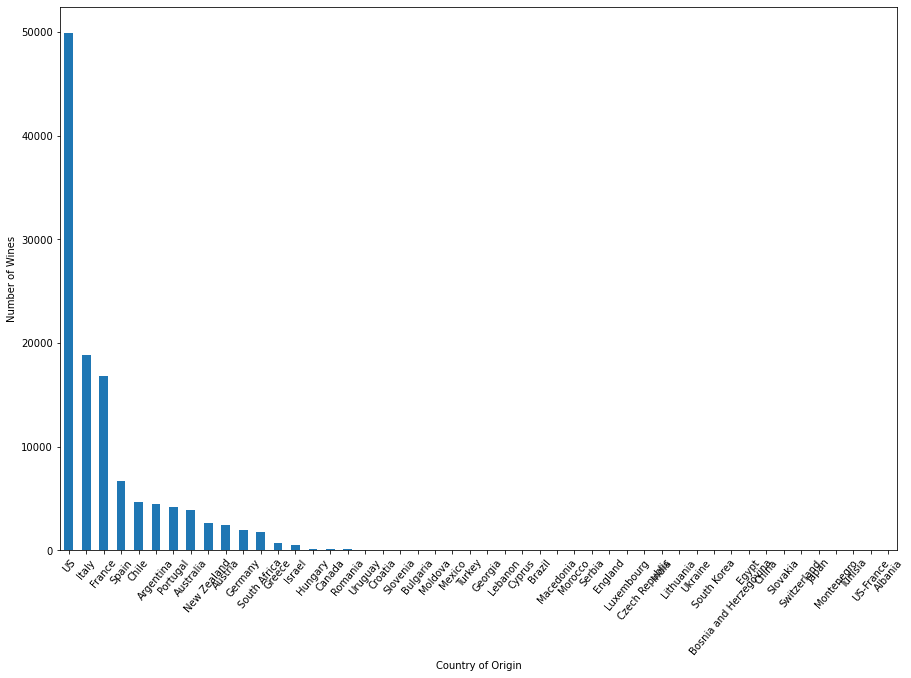

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline  

df = pd.read_csv("dev.tsv",sep='\t')
df[["country", "description","quality"]].head()
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()
country.mean().sort_values(by="quality",ascending=False).head()
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

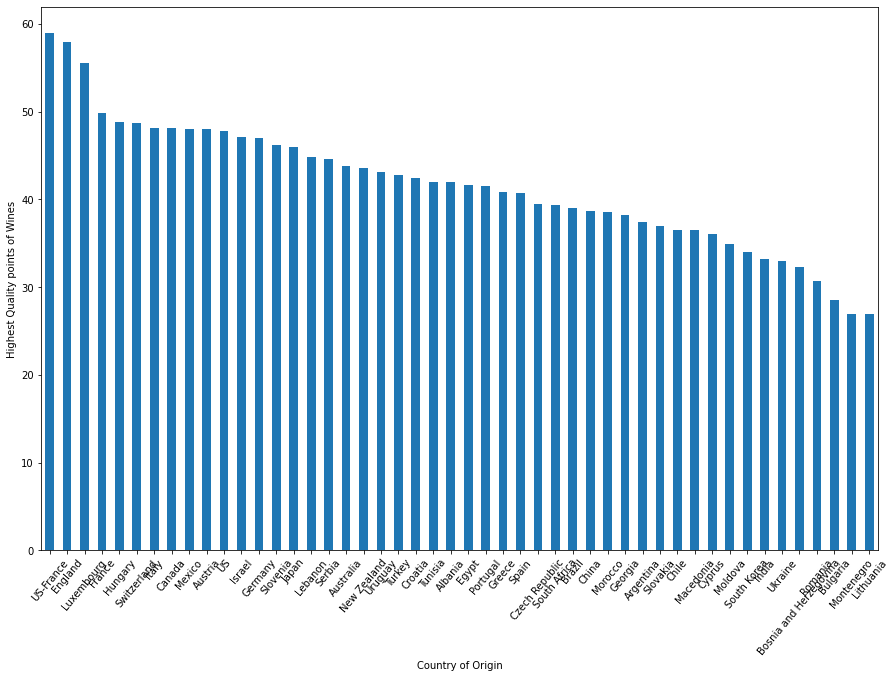

In [77]:
%matplotlib inline  
#%matplotlib notebook
plt.figure(figsize=(15,10))
country.mean().sort_values(by="quality",ascending=False)["quality"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest Quality points of Wines")

plt.show()

There are 29160927 words in the combination of all review.


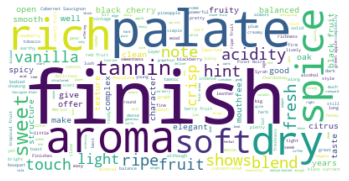

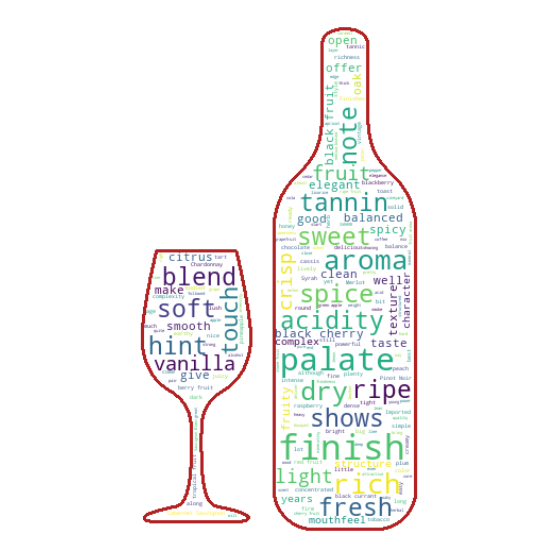

In [70]:
from nltk.corpus import stopwords
from PIL import Image

text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.words(')
stopwords.update(["drink", "now", "wine", "flavor", "flavors","nose","one","show","feel","made","full","year","mouth"])


wine_mask = np.array(Image.open("wine_mask.png"))
wine_mask
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
transformed_wine_mask
wc = WordCloud(background_color="white", max_words=500, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
